## Import Data

## Introduction

In this example, we will using a simply long hold strategy to demostrate the usage of different rebalancing methods.


We are using a simple version of Ray Dalio's All Weather Portfolio as an example. Ray Dalio's All Weather portfolio consists of the following assets and target weights:

- US Stocks (40%)
- Long Term US Bonds (30%)
- Intermediate US Bonds (15%)
- Gold (7.5%)
- Commodities (7.5%)


In this example, we will simplify it to US Stock Index Fund, Bond ETF and Gold ETF with the following target weights:
- US Stock Index Fund (50%)
- Bond ETF (40%)
- Gold ETF (10%)



In [1]:
from tiportfolio.helpers.data import Alpaca
import dotenv

dotenv.load_dotenv()

import os
alpaca = Alpaca(os.environ['ALPACA_API_KEY'], os.environ['ALPACA_API_SECRET'])

In [2]:
%matplotlib inline


In [3]:
# use apple to test long hold strategy

apple_df = alpaca.query('AAPL', '2019-01-01', '2020-12-31', '1D')
# use date column as index
# apple_df.set_index('date', inplace=True)

Loading bar data...
Loaded bar data: 0:00:02 



In [4]:
# Fix the index to set it to market open time (9:30 AM) - required for rebalancing to work
import pandas as pd

# Set date as index if not already set
if apple_df.index.name != 'date' and 'date' in apple_df.columns:
    apple_df.set_index('date', inplace=True)

# Set index to market open time (9:30 AM) to match rebalance time requirements
# This is critical - rebalancing checks for exact time match (9:30:00)
market_open_index = apple_df.index.normalize() + pd.Timedelta(hours=9, minutes=30)
market_open_index = market_open_index.tz_convert("America/New_York")
apple_df.index = market_open_index
apple_df.index.name = "date"


In [5]:
apple_df.index

DatetimeIndex(['2019-01-02 09:30:00-05:00', '2019-01-03 09:30:00-05:00',
               '2019-01-04 09:30:00-05:00', '2019-01-07 09:30:00-05:00',
               '2019-01-08 09:30:00-05:00', '2019-01-09 09:30:00-05:00',
               '2019-01-10 09:30:00-05:00', '2019-01-11 09:30:00-05:00',
               '2019-01-14 09:30:00-05:00', '2019-01-15 09:30:00-05:00',
               ...
               '2020-12-16 09:30:00-05:00', '2020-12-17 09:30:00-05:00',
               '2020-12-18 09:30:00-05:00', '2020-12-21 09:30:00-05:00',
               '2020-12-22 09:30:00-05:00', '2020-12-23 09:30:00-05:00',
               '2020-12-24 09:30:00-05:00', '2020-12-28 09:30:00-05:00',
               '2020-12-29 09:30:00-05:00', '2020-12-30 09:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='date', length=504, freq=None)

## Try Long Hold Strategy

In [6]:
from tiportfolio.strategy_library.trading.long_hold import LongHold
long_hold_strategy = LongHold(stock_symbol="AAPL", prices=apple_df)
long_hold_strategy.before_all()

for step in long_hold_strategy.all_steps:
    long_hold_strategy.execute(step)



long_hold_strategy.after_all()[0]

,symbol,open,high,low,close,volume,vwap,signal,pnl,value,cumulative_pnl,cumulative_max,drawdown,max_drawdown,mar_ratio
date,,,,,,,,,,,,,,,
2019-01-02 09:30:00-05:00,AAPL,36.82,37.76,36.66,37.54,158163180.0,37.33,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2019-01-03 09:30:00-05:00,AAPL,34.23,34.64,33.76,33.80,387734780.0,34.11,1.0,-0.099627,0.900373,-0.099627,1.000000,-0.099627,-0.099627,-1.000000
2019-01-04 09:30:00-05:00,AAPL,34.36,35.31,34.18,35.24,247113388.0,34.92,1.0,0.042604,0.938732,-0.061268,1.000000,-0.061268,-0.099627,-0.614973
2019-01-07 09:30:00-05:00,AAPL,35.35,35.38,34.68,35.17,230235968.0,35.04,1.0,-0.001986,0.936867,-0.063133,1.000000,-0.063133,-0.099627,-0.633690
2019-01-08 09:30:00-05:00,AAPL,35.55,36.09,35.31,35.84,173051260.0,35.69,1.0,0.019050,0.954715,-0.045285,1.000000,-0.045285,-0.099627,-0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23 09:30:00-05:00,AAPL,128.66,128.93,127.32,127.50,96689113.0,128.09,1.0,-0.006932,3.396377,2.396377,3.473895,-0.022314,-0.314253,7.625625
2020-12-24 09:30:00-05:00,AAPL,127.85,129.93,127.63,128.48,56888726.0,128.86,1.0,0.007686,3.422483,2.422483,3.473895,-0.014799,-0.314253,7.708696
2020-12-28 09:30:00-05:00,AAPL,130.45,133.71,129.98,133.08,131183580.0,132.28,1.0,0.035803,3.545019,2.545019,3.545019,0.000000,-0.314253,8.098624


In [7]:
long_hold_strategy.after_all()[1]

{'final_value': 3.467767714437935,
 'total_return': 2.467767714437935,
 'max_drawdown': -0.314253222137983,
 'mar_ratio': 7.852800037017224}

## Try on Fix Ratio Frequency Based Allocation

In [8]:
from tiportfolio.portfolio.allocation.allocation import PortfolioConfig
from tiportfolio.portfolio.allocation.frequency_based_allocation import RebalanceFrequency
from tiportfolio.strategy_library.allocation.fix_ratio import FixRatioFrequencyBasedAllocation

config:PortfolioConfig = {
    "commission": 0.0001,
    "slippage": 0.0,
    "risk_free_rate": 0.0,
    "initial_capital": 100_000,
    "market_name": "NYSE",
}

long_hold_strategy = LongHold(stock_symbol="AAPL", prices=apple_df.loc["2019-01-01":"2019-03-31"])

fix_percentage_allocation = FixRatioFrequencyBasedAllocation(
    config=config,
    strategies=[long_hold_strategy],
    allocation_ratio_list=[1.0],
    rebalance_frequency=RebalanceFrequency.mid_of_month,
)

INFO:default_logger:Initialized Allocation with 1 strategies with initial capital 100000. 
INFO:default_logger: - Strategy: LongHold - AAPL


INFO:default_logger:Starting walk-forward allocation process...
  3%|▎         | 2/61 [00:00<00:07,  8.03it/s]DEBUG:default_logger:At 2019-01-04 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-07 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
  7%|▋         | 4/61 [00:00<00:06,  9.40it/s]DEBUG:default_logger:At 2019-01-08 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:At 2019-01-09 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
 15%|█▍        | 9/61 [00:01<00:06,  8.51it/s]DEBUG:default_logger:At 2019-01-15 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
DEBUG:default_logger:Rebalancing at 2019-01-15 09:30:00-05:00
DEBUG:default_logger:At 2019-01-16 09:30:00-05:00, Strategy LongHold - AAPL generated signal: TradingSignal.LONG
 18%|█▊        | 11/61 [00:01<00:04, 10.73it/s]DEBUG:defau

Starting portfolio evaluation...


  0%|          | 0/61 [00:00<?, ?it/s]DEBUG:default_logger:No rebalance at 2019-01-02 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-03 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-04 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-07 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-08 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-09 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-10 09:30:00-05:00, log overall trade data
DEBUG:default_logger:Total value: 100000.0
DEBUG:default_logger:No rebalance at 2019-01-11 09:3

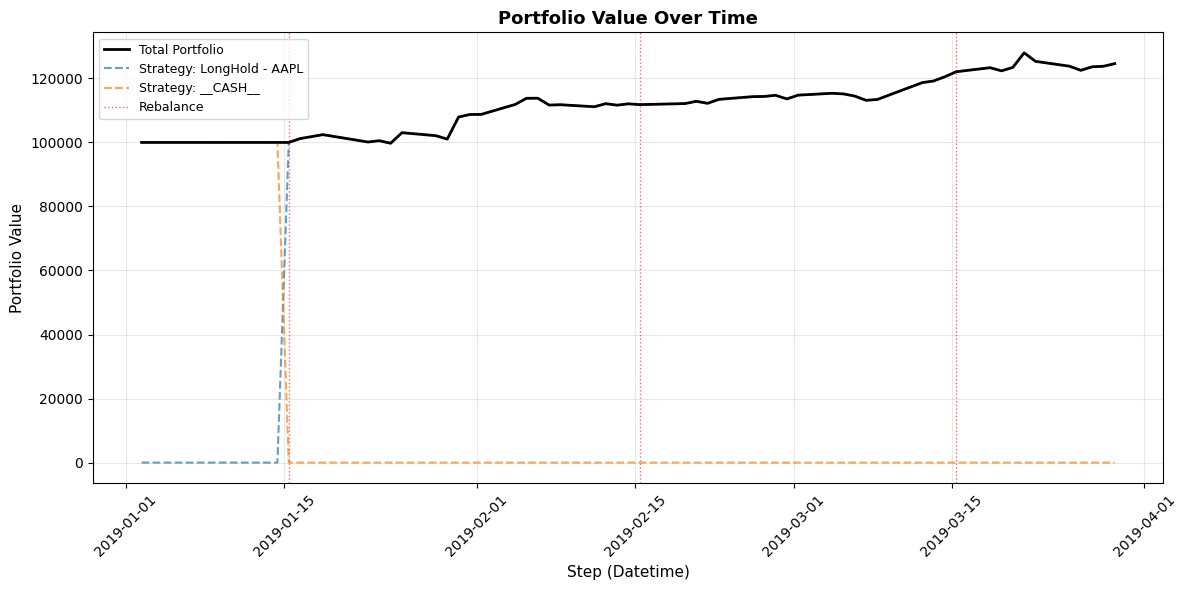

{'final_value': 124609.68672712284,
 'total_return': 0.2460968672712284,
 'max_drawdown': -0.0427221983683983,
 'sharpe_ratio': np.float64(6.628813568661115),
 'annualized_return': 1.5195186509091725,
 'mar_ratio': 5.7603980288913865}

In [9]:
fix_percentage_allocation.walk_forward()
fix_percentage_allocation.evaluate()
fix_percentage_allocation.get_performance_metrics(plot=True)

In [10]:
fix_percentage_allocation.portfolio_df

signal   open   high    low  close  \
datetime                  strategy_name                                        
2019-01-02 09:30:00-05:00 LongHold - AAPL    1.0  36.82  37.76  36.66  37.54   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-01-03 09:30:00-05:00 LongHold - AAPL    1.0  34.23  34.64  33.76   33.8   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-01-04 09:30:00-05:00 LongHold - AAPL    1.0  34.36  35.31  34.18  35.24   
...                                          ...    ...    ...    ...    ...   
2019-03-27 09:30:00-04:00 __CASH__             0    1.0    1.0    1.0    1.0   
2019-03-28 09:30:00-04:00 LongHold - AAPL    1.0  45.11  45.25  44.77  45.05   
                          __CASH__             0    1.0    1.0    1.0    1.0   
2019-03-29 09:30:00-04:00 LongHold - AAPL    1.0  45.32  45.38  45.01  45.35   
                          __CASH__             0    1.0    1.0    1.0    1.0   

                                              quantity          value fees  \
datetime                  strategy_name                                      
2019-01-02 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
                          __CASH__              100000         100000  0.0   
2019-01-03 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
                          __CASH__              100000         100000  0.0   
2019-01-04 09:30:00-05:00 LongHold - AAPL          0.0            0.0  0.0   
...                                                ...            ...  ...   
2019-03-27 09:30:00-04:00 __CASH__                 0.0            0.0  0.0   
2019-03-28 09:30:00-04:00 LongHold - AAPL  2747.732894  123785.366859  0.0   
                          __CASH__                 0.0            0.0  0.0   
2019-03-29 09:30:00-04:00 LongHold - AAPL  2747.732894  124609.686727  0.0   
                          __CASH__                 0.0            0.0  0.0   

                                          cost_basis  
datetime                  strategy_name               
2019-01-02 09:30:00-05:00 LongHold - AAPL        0.0  
                          __CASH__               0.0  
2019-01-03 09:30:00-05:00 LongHold - AAPL        0.0  
                          __CASH__               0.0  
2019-01-04 09:30:00-05:00 LongHold - AAPL        0.0  
...                                              ...  
2019-03-27 09:30:00-04:00 __CASH__               0.0  
2019-03-28 09:30:00-04:00 LongHold - AAPL       10.0  
                          __CASH__               0.0  
2019-03-29 09:30:00-04:00 LongHold - AAPL       10.0  
                          __CASH__               0.0  

[122 rows x 9 columns]

# Comparison between Long Hold SPY and SPY + SGOV + GLD Fix Ratio Rebalance